In [1]:
include("PVCR.jl");

In [2]:
PVRes.capacity = 3.0
ebalance = annual_energy_balance(residential, PVRes, print_output=true);

month consumer_energy PV_energy  | injection_grid withdrawn_energy grid_energy  | global_generation global_withdrawal global_allowance max_surplus carryover 
1 544.32 573.9  | 313.42 283.85 0.0  | 573.9 283.85 281.21 0.0 0.0 
2 544.83 425.88  | 186.28 186.28 118.96  | 999.77 470.12 489.89 19.76 0.0 
3 551.96 409.62  | 193.79 193.79 142.34  | 1409.39 663.91 690.6 26.69 0.0 
4 541.83 519.08  | 272.17 269.35 25.57  | 1928.48 933.27 944.95 11.69 2.82 
5 552.82 535.3  | 265.07 265.06 17.52  | 2463.78 1198.33 1207.25 8.92 2.83 
6 558.78 496.88  | 241.08 242.18 60.81  | 2960.66 1440.51 1450.72 10.21 1.73 
7 536.32 493.08  | 244.74 244.69 43.29  | 3453.74 1685.2 1692.33 7.13 1.78 
8 545.54 551.45  | 305.05 299.14 0.0  | 4005.18 1984.34 1962.54 0.0 0.0 
9 537.36 520.2  | 260.76 258.2 19.72  | 4525.38 2242.55 2217.44 0.0 0.0 
10 559.72 486.24  | 241.75 240.58 74.64  | 5011.62 2483.13 2455.69 0.0 0.0 
11 558.61 465.89  | 225.17 224.38 93.51  | 5477.51 2707.51 2683.98 0.0 0.0 
12 558.67 534.3  | 2

In [3]:
ebalance[1]

Dict{String,Real} with 12 entries:
  "PV_energy"         => 573.896
  "max_surplus"       => 0.0
  "consumer_energy"   => 544.324
  "withdrawn_energy"  => 283.847
  "peak_demand"       => 1.18343
  "injection_grid"    => 313.418
  "grid_energy"       => 0
  "global_generation" => 573.896
  "peak_power"        => 1.18343
  "global_allowance"  => 281.209
  "carry_over"        => 0.0
  "global_withdrawal" => 283.847

In [4]:
bills_residential = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "demand_charge", " ", "total_cost", " | ", "counterfactual_cost", " ", "savings")
for m in 1:12
    bills_residential[m] = monthly_bill(ebalance[m], residential, print_output=true)
end

grid_cost withdrawn_energy_cost demand_charge total_cost | counterfactual_cost savings
0.0 5969.3 0.0 7070.06  | 77821.87 70751.81
7509.88 3917.41 0.0 13674.93  | 77882.32 64207.39
8985.91 4075.4 0.0 15637.88  | 78726.47 63088.59
1614.46 5664.5 0.0 8651.42  | 77526.97 68875.56
1106.03 5574.31 0.0 7932.89  | 78827.82 70894.93
3838.74 5093.01 0.0 10650.57  | 79533.36 68882.79
2732.71 5145.86 0.0 9382.5  | 76873.46 67490.96
0.0 6290.98 0.0 7451.07  | 77966.39 70515.32
1244.71 5430.03 0.0 7767.05  | 76996.9 69229.85
4711.9 5059.47 0.0 11661.34  | 79644.54 67983.2
5903.18 4718.61 0.0 12690.86  | 79513.48 66822.63
1735.54 6064.75 0.0 9271.14  | 79521.05 70249.91


In [5]:
function plot_bill(bill::Dict, fields::Array{String})
    cum_sum = Array{Float64,1}(undef, 12)
    for i in 1:length(fields)
        var = [bill[m]["$(fields[i])"] for m in 1:12]
        bar(collect(1:12), bottom = cum_sum, var, label="$(fields[i])")
        cum_sum += var
    end
    legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
end

plot_bill (generic function with 1 method)

In [6]:
function plot_bill(bill1::Dict, bill2::Dict, fields::Array{String})
    cum_sum = Array{Float64,1}(undef, 12)
    for i in 1:length(fields)
        var = [bill[m]["$(fields[i])"] for m in 1:12]
        bar(collect(1:12), bottom = cum_sum, var, label="$(fields[i])")
        cum_sum += var
    end
    
end

plot_bill (generic function with 2 methods)

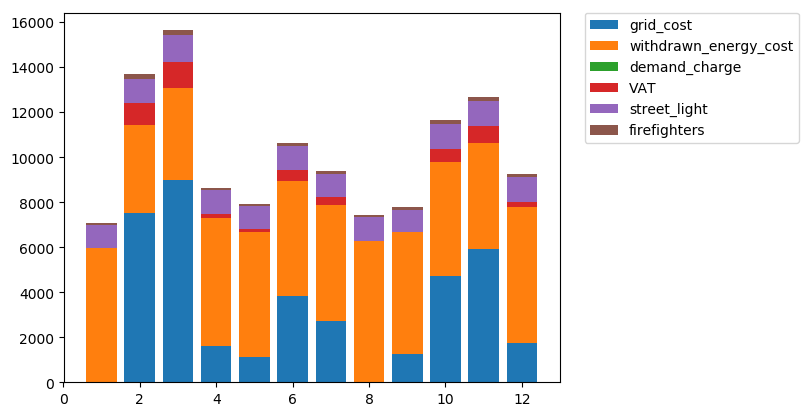

PyObject <matplotlib.legend.Legend object at 0x124171358>

In [7]:
plot_bill(bills_residential, ["grid_cost", "withdrawn_energy_cost", "demand_charge", "VAT", "street_light", "firefighters"])

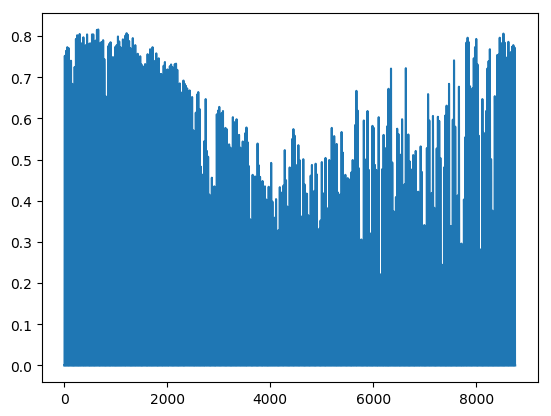

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x131c18908>

In [8]:
plot(PVRes.time_series)